In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("spam.tsv", sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
# To know any null values
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
len(df)

5572

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
## Balance the Data

In [7]:
ham= df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam= df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [10]:
# Equal both sets
ham= ham.sample(spam.shape[0])

In [11]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [13]:
# Now append the ham and spam
data= ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


# Exploratory Data Analysis

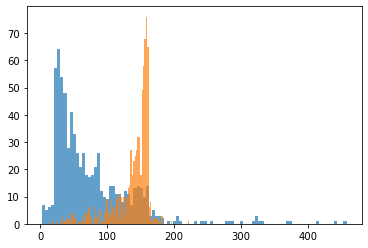

In [14]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show()

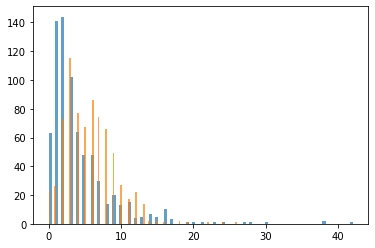

In [15]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

# DATA PREPARATION

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
data.head()

,label,message,length,punct
0,ham,She's fine. Sends her greetings,31,2
1,ham,No..jst change tat only..,25,4
2,ham,Man this bus is so so so slow. I think you're ...,71,2
3,ham,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L...",58,3
4,ham,"He has lots of used ones babe, but the model d...",107,4


In [28]:
X_train, X_test, y_train, y_test= train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True, stratify=data['label'])

In [31]:
X_train

1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Can meh? Thgt some will clash... Really ah, i ...
477                    I'm in class. Did you get my text.
542                            I am on the way to ur home
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     Omw back to tampa from west palm, you hear wha...
268                              Shb b ok lor... Thanx...
272                       Mah b, I'll pick it up tomorrow
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: message, Length: 1045, dtype: object

# Bag of Words Creation

In [22]:
#vectorizer= TfidfVectorizer()

In [23]:
#X_train= vectorizer.fit_transform(X_train)

In [24]:
#X_train.shape

(1045, 3734)

In [25]:
#X_train

<1045x3734 sparse matrix of type '<class 'numpy.float64'>'
	with 18270 stored elements in Compressed Sparse Row format>

# PIPELINE AND Random Forest

In [32]:
clf= Pipeline([('tfidf',TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [33]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [34]:
y_pred= clf.predict(X_test)

In [35]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 29, 195]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.87      0.93       224

    accuracy                           0.93       449
   macro avg       0.94      0.93      0.93       449
weighted avg       0.94      0.93      0.93       449



In [37]:
accuracy_score(y_test,y_pred)

0.933184855233853

In [38]:
# TESTING OUR DATA

In [39]:
clf.predict(["Hey, whassup"])

array(['ham'], dtype=object)

In [40]:
clf.predict(["Congratulations!, you have won free tickets to the USA this summer"])

array(['spam'], dtype=object)

# PIPELINE AND SVM

In [44]:
# Put random value for better accuracy like, 100, 200, 1000
clf= Pipeline([('tfidf',TfidfVectorizer()), ('clf', SVC(C=1000, gamma='auto'))])

In [45]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [46]:
y_pred= clf.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 20, 204]], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.95       225
        spam       0.99      0.91      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [49]:
accuracy_score(y_test,y_pred)

0.9487750556792873

In [50]:
clf.predict(["Hey, whassup"])

array(['ham'], dtype=object)

In [51]:
clf.predict(["Congratulations!, you have won free tickets to the USA this summer"])

array(['spam'], dtype=object)